### Проверка и приоритизация гипотез
___
##### В полученном файле 9 гипотез по увеличению выручки интернет-магазина. Перед нами стоит задача приоритизировать гипотезы, а потом проанализировать A/B тест
___
###### Данное исследование разделим на несколько шагов. 

#### Часть 0. Загрузка баз и файлов. 
* [0.1. Загрузка баз и файлов](#0-bullet)

#### Часть 1. Приоритизация гипотез. 
* [1.1. Применение фреймворка ICE](#1-bullet)
* [1.2. Применение фреймворка RICE](#2-bullet)
* [1.3. Выводы](#3-bullet)

#### Часть 2. Анализ A/B-теста. 
* [2.1. График кумулятивной выручки по группам](#4-bullet)
* [2.2. График кумулятивного среднего чека по группам](#5-bullet)
* [2.3. График относительного изменения кумулятивного среднего чека группы B к группе A](#6-bullet)
* [2.4. График кумулятивной конверсии по группам](#7-bullet)
* [2.5. График относительного изменения кумулятивной конверсии группы B к групппе A](#8-bullet)
* [2.6. Точечный график количества заказов на пользователя](#9-bullet)
* [2.7. Расчет перцентилей количества заказов на пользователя](#10-bullet)
* [2.8. Точечный график стоимостей заказов](#11-bullet)
* [2.9. Расчет перцентилей стоимостей заказов](#12-bullet)
* [2.10. Расчет стат. значимости различий в конверсии между групппами. "Сырые" данные](#13-bullet)
* [2.11. Расчет стат. значимости различий в среднем чеке между группами. "Сырые" данные"](#14-bullet)
* [2.12. Расчет стат. значимости различий в конверсии между групппами. "Очищенные" данные](#15-bullet)
* [2.13. Расчет стат. значимости различий в среднем чеке между группами. "Очищенные" данные"](#16-bullet)
* [2.14. Принятие решения по результатам теста](#17-bullet)

<a id='0-bullet'></a>
### Часть 0. Загрузка баз и файлов

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

data=pd.read_csv('/datasets/hypothesis.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
orders = pd.read_csv('/datasets/orders.csv')

In [2]:
data.columns = data.columns.str.lower()
pd.options.display.max_colwidth = -1

### Часть 1. Приоритизация гипотез

<a id='1-bullet'></a>
#### 1.1. Применение фреймворка ICE

In [3]:
data['ICE']=(data['impact']*data['confidence'])/data['efforts']

data[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE: **8 (запустить акцию в день рождения), 0 (добавить два новых канала привлечения) и 7 (добавить форму подписки на основные страницы)**.

<a id='2-bullet'></a>
#### 1.2. Применение фреймворка RICE

In [4]:
data['RICE']=(data['reach']*data['impact']*data['confidence'])/data['efforts']
data[['hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE: **7 (добавить форму подписки на основные страницы), 2 (добавить блоки рекомендаций товаров), 0 (добавить два новых канала привлечения)**

<a id='3-bullet'></a>
#### 1.3. Выводы

При применении RICE на **первое место вышла гипотеза 7 (добавить форму подписки на основыне страницы)**, а на второе место вышла гипотеза 2 (добавить блоки рекомендаций товаров), а гипотеза 8 (запустить акцию в день рождения) отодвинулась только на 5 место.   
Это произошло из-за того, что **гипотеза 8 затрагивает значительно меньше пользователей** по сравнению с 7 и 2 гипотезой - значение reach 1 против 10 и 8 соответственно.  

Попробуем посмотреть одновременно на приоритизацию RICE и ICE - для этого построим матрицу приоритизации, где по оси X будут значения RICE, по оси Y - значения ICE.  
Разделив пространство графика средними значений RICE и ICE получим следующие квадранты:  
 - **Квадрант 1** (верхний левый квадрант): значения по ICE выше среднего, по RICE ниже среднего. 
 - **Квадрант 2** (верхний правый квадрант): значения по ICE выше среднего, по RICE также выше среднего.
 - **Квадрант 3** (нижний левый квадрант): значения по ICE ниже среднего, по RICE также ниже среднего.
 - **Квадрант 4** нижнйи правый квадрант): значения по ICE ниже среднего, по RICE выше среднего.
  
Соответственно самые **приоритетные гипотезы** находятся **в квадранте 2**, а в квадранте 3 будут находиться те гипотезы, тестирование которых необходимо делать в последнюю очередь (если вообще делать)

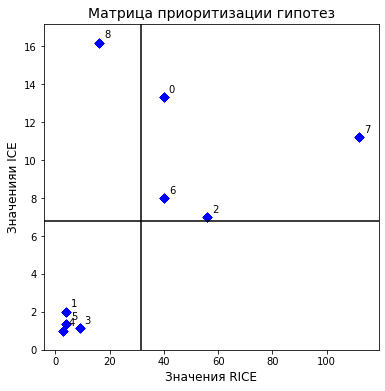

In [5]:
data['hypothesis_index']=pd.Series(range(0, len(data)))

x = data['RICE'].values
y = data['ICE'].values
types=data['hypothesis_index'].values

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y)

ax.set_xlabel('Значения RICE', fontsize=12)
ax.set_ylabel('Значенияи ICE', fontsize=12)
ax.set_title('Матрица приоритизации гипотез', fontsize=14)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(x, y, marker='D', color='blue') 
    
plt.axhline(y=data['ICE'].mean(), color='black', linestyle='-')
plt.axvline(x=data['RICE'].mean(), color='black', linestyle='-')
plt.show()

Гипотезы, которыми необходимо заняться в первую очередь **находятся в квадранте 2** - это гипотезы 7 (добавить форму подписки на основыне страницы), 0 (добавить два новых канала привлечения), 2 (добавить блоки рекомендаций товаров) и 6 (показать на главной странице баннеры с актуальными акциями).

### Часть 2. Анализ A/B-теста. 

<a id='4-bullet'></a>
#### 2.1. График кумулятивной выручки по группам

In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
# приводим к формату даты
orders['date']=orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
visitors['date']=visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [9]:
# создаем датафрейм с уникальными значениями дат и групп для таблицы orders
datesGroups=orders[['date','group']].drop_duplicates()

In [10]:
# соберем агрегированные куммулятивные данные по дням о заказах
ordersAggregated=datesGroups.apply(lambda x: 
                    orders[np.logical_and(orders['date']<= x['date'], 
                                          orders['group'] == x['group'])].agg({
                                                     'date':'max',
                                                     'group':'max',
                                                     'transactionId':'nunique',
                                                     'visitorId':'nunique',
                                                     'revenue':'sum'}),
                                   axis=1).sort_values(by=['date','group']) 

In [11]:
# # соберем агрегированные куммулятивные данные по дням о посетителях
visitorsAggregated=datesGroups.apply(lambda x: 
visitors[np.logical_and(visitors['date']<= x['date'], visitors['group'] == x['group'])]\
.agg({'date':'max','group':'max','visitors':'sum'}),axis=1)\
.sort_values(by=['date','group'])

In [12]:
# объединим данные о заказах и покупателях 
cumulativeData=ordersAggregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date','group'])
cumulativeData.columns=['date','group','orders','buyers','revenue','visitors']

In [13]:
# создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе A 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]

In [14]:
# создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B 
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


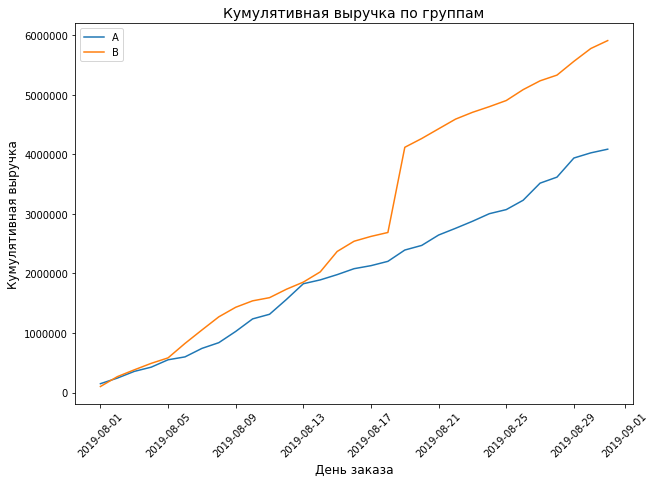

In [15]:
# построим график кумулятивной выручки по группам
plt.figure(figsize=(10, 7))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по группам',fontsize=14)
plt.xlabel('День заказа', fontsize=12)
plt.ylabel('Кумулятивная выручка',fontsize=12)
plt.xticks(rotation=45)
plt.show()

Выручка **почти равномерно растет** на протяжении всего теста - хороший знак, но можно заметить несколько точек, где **выручка резко растет**. Такие точки могут сигнализировать о всплесках заказов, либо появлении очень дорогих заказов в выборке. Выбросы проанализируем чуть позже.

<a id='5-bullet'></a>
#### 2.2. График кумулятивного среднего чека по группам

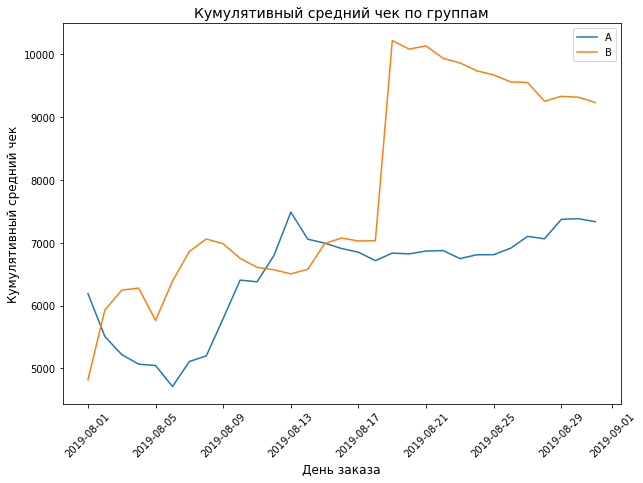

In [16]:
# построим график кумулятивного среднего чека по группам
plt.figure(figsize=(10, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам', fontsize=14)
plt.xlabel('День заказа', fontsize=12)
plt.ylabel('Кумулятивный средний чек',fontsize=12)
plt.xticks(rotation=45)
plt.show()

Заметно, что ближе к концу теста средний чек становится относительно равномерным: установился для группы A и продолжает падать для группы B из-за того, что в середине теста в нее попали крупные заказы (резкий всплеск на графике). Соответственно группе B нужно больше данных, чтобы прийти к ее реальному среднему чеку и установиться на его уровне.  

<a id='6-bullet'></a>
#### 2.3. График относительного изменения кумулятивного среднего чека группы B к группе A

In [17]:
# объединими данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,left_on='date',right_on='date',how='left',suffixes=['A','B'])

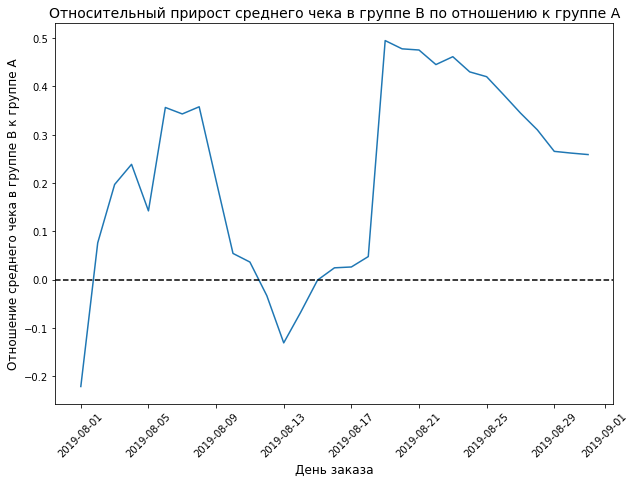

In [18]:
# построим график относительного изменения кумулятивного среднего чека группы B к A 
plt.figure(figsize=(10, 7))
plt.plot(mergedCumulativeRevenue['date'],
((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']))-1)
plt.title('Относительный прирост среднего чека в группе B по отношению к группе A', fontsize=14)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('День заказа', fontsize=12)
plt.ylabel('Отношение среднего чека в группе B к группе A',fontsize=12)
plt.show()

График различия между группами в нескольких точках сильно скачет, это еще раз сигнализирует о наличии выбросов в выборке.

<a id='7-bullet'></a>
#### 2.4. График кумулятивной конверсии по группам

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion']=cumulativeData['orders']/cumulativeData['visitors']

In [20]:
# отделяем данные по группе A 
cumulativeDataA=cumulativeData[cumulativeData['group']=='A']

In [21]:
# отделяем данные по группе B 
cumulativeDataB=cumulativeData[cumulativeData['group']=='B']

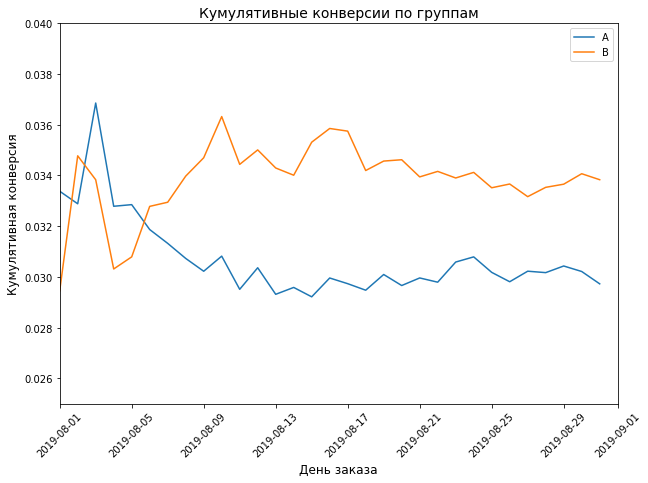

In [22]:
# строим графики
plt.figure(figsize=(10, 7))
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'],label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'],label='B')
plt.title('Кумулятивные конверсии по группам',fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.04]) 
plt.xlabel('День заказа', fontsize=12)
plt.ylabel('Кумулятивная конверсия',fontsize=12)
plt.show()

Сначала группы колебались примерно у одного значения, но потом группа B вырвалась вперед и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

<a id='8-bullet'></a>
#### 2.5. График относительного изменения кумулятивной конверсии группы B к групппе A

In [23]:
# объединим данные
mergedCumulativeConversions=cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],left_on='date',right_on='date',how='left', suffixes=['A','B'])

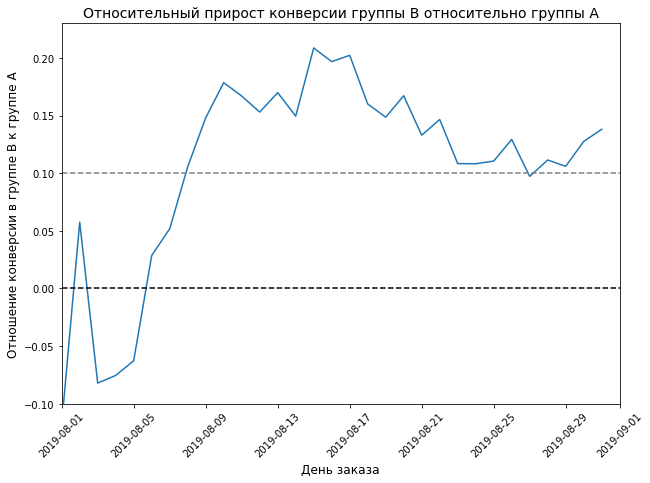

In [24]:
# построим график
plt.figure(figsize=(10, 7))
plt.plot(mergedCumulativeConversions['date'],
(mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA'])-1)
plt.title('Относительный прирост конверсии группы B относительно группы A',fontsize=14)
plt.xticks(rotation=45)
plt.axis(["2019-08-01", '2019-09-01', -0.1, 0.23]) 
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--') 
plt.xlabel('День заказа', fontsize=12)
plt.ylabel('Отношение конверсии в группе B к группе A',fontsize=12)
plt.show()

В начале теста группа B проигрывала, но через несколько дней вырвалась вперед и стабилизировалась на уровне выше 0.1, хотя при этом всё равно наблюдаются скачки в конверсиях. 

<a id='9-bullet'></a>
#### 2.6. Точечный график количества заказов на пользователя

In [25]:
# посчитаем количества заказов на пользователя
ordersByUsers=orders.drop(['group','revenue','date'],
axis=1).groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsers.columns=['userId','orders']

In [26]:
# создадим переменную с количеством юзеров
x_values=pd.Series(range(0, len(ordersByUsers)))

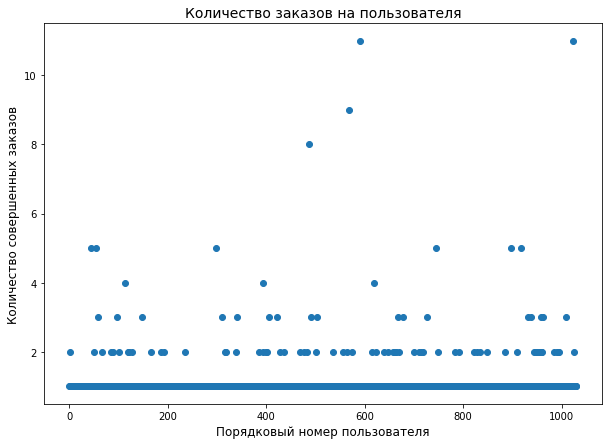

In [27]:
# построим график
plt.figure(figsize=(10, 7))
plt.scatter(x_values,ordersByUsers['orders'])
plt.title('Количество заказов на пользователя', fontsize=14)
plt.xlabel('Порядковый номер пользователя', fontsize=12)
plt.ylabel('Количество совершенных заказов',fontsize=12)
plt.show()

Большинство пользователей делали заказ 1 раз. Но на графике можно заметить много пользователей, которые совершали заказ больше 2 раз. Их точная доля не ясна - непонятно, можно ли считать их аномалиями или нет. Далее, проверим это 

<a id='10-bullet'></a>
#### 2.7. Расчет перцентилей количества заказов на пользователя

In [28]:
# посчитаем 95 и 99 перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'],[95, 99]))

[2. 4.]


Не более 5% пользователей оформляли заказ больше 2 раз, а  1% - более 4.  
Соответственно **аномальными** пользователями будем считать тех, кто **сделал более 2 заказов**.

<a id='11-bullet'></a>
#### 2.8. Точечный график стоимостей заказов

In [29]:
# создадим переменную с количеством заказов
x_values=pd.Series(range(0, len(orders)))

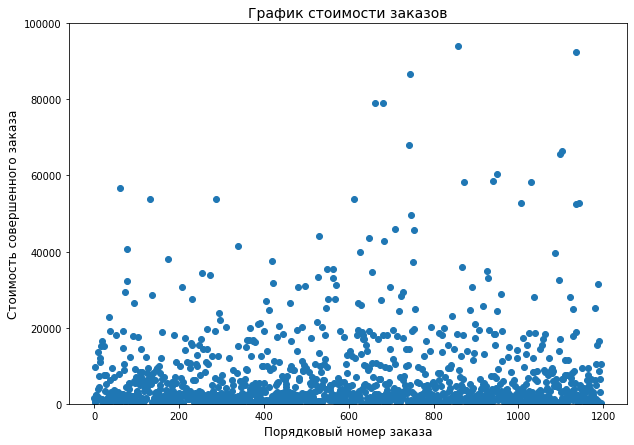

In [30]:
# построим график
plt.figure(figsize=(10, 7))
plt.scatter(x_values,orders['revenue'])
plt.title('График стоимости заказов', fontsize=14)
plt.ylim(0,100000)
plt.xlabel('Порядковый номер заказа', fontsize=12)
plt.ylabel('Стоимость совершенного заказа',fontsize=12)
plt.show()

Большинство заказов стоит **до 10 тысяч**, но есть много заказов дороже 20 тысяч. Чтобы понять сумму аномальных заказов, далее посчитаем перцентили стоимости заказов.

<a id='12-bullet'></a>
#### 2.9. Расчет перцентилей стоимостей заказов

In [31]:
# посчитаем 95 и 99 перцентили стоимости заказов
print(np.percentile(orders['revenue'],[95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28 тысяч и не более 1% дороже 58233 тысяч.  
Соответственно заказы стоимостью дороже 28 тысяч будем считать аномальными.

<a id='13-bullet'></a>
#### 2.10. Расчет стат. значимости различий в конверсии между групппами. "Сырые" данные

In [32]:
# Посчитаем количество посетителей группы А в день и кумуляту
visitorsADaily=visitors[visitors['group']=='A'][['date','visitors']]
visitorsADaily.columns=['date','visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [33]:
# Посчитаем количество посетителей группы B в день и кумуляту
visitorsBDaily=visitors[visitors['group']=='B'][['date','visitors']]
visitorsBDaily.columns=['date','visitorsPerDateB']
 
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [34]:
# Посчитаем количество заказов в группе A в день и кумуляту
ordersADaily=orders[orders['group']=='A'][['date','transactionId','visitorId','revenue']]\
.groupby('date',as_index=False)\
.agg({'transactionId':pd.Series.nunique,'revenue':'sum'})
ordersADaily.columns=['date','ordersPerDateA','revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [35]:
# Посчитаем количество заказов в группе B в день и кумуляту
ordersBDaily=orders[orders['group']=='B'][['date','transactionId','visitorId','revenue']]\
.groupby('date',as_index=False)\
.agg({'transactionId':pd.Series.nunique,'revenue':'sum'})
ordersBDaily.columns=['date','ordersPerDateB','revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [36]:
# Объединим все данные, посчитанные выше
data_new = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [37]:
# число заказов пользователями группы A
ordersByUsersA=orders[orders['group']=='A'].groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersA.columns=['userId','orders']

In [38]:
# число заказов пользователями группы B
ordersByUsersB=orders[orders['group']=='B'].groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersB.columns=['userId','orders']

In [39]:
# объявим переменную, в которой пользователям будет соответствовать количество заказаов, тем, кто ничего не заказал поставим 0
sampleA=pd.concat([ordersByUsersA['orders'],
pd.Series(0,index=np.arange(data_new['visitorsPerDateA'].sum() - 
len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [40]:
# объявим переменную, в которой пользователям будет соответствовать количество заказаов, тем, кто ничего не заказал поставим 0
sampleB=pd.concat([ordersByUsersB['orders'],
pd.Series(0,index=np.arange(data_new['visitorsPerDateB'].sum() - 
len(ordersByUsersB['orders'])),name='orders')],axis=0)

Далее, проверим следующую статистическую гипотезу:  
**H0** = средняя конверсия в групппе A равна средней конверсии в группе B  
**H1** = средние конверсии в группе A и B отличаются  
alpha = .05

In [41]:
# проверка гипотезы
alpha = .05

results = stats.mannwhitneyu(
    sampleA,
    sampleB)

print('p-значение:{0:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительная разница группы B к группе A:{0:.1%}".format(sampleB.mean()/sampleA.mean()-1))     

p-значение:0.00840
Отвергаем нулевую гипотезу
Относительная разница группы B к группе A:13.8%


`p-value = 0.008`, что меньше, чем 0.05. Соответственно мы вынуждены **отклонить нулевую гипотезу** о том, что статистически значимых различий в конверсии между группами нет. Так, **относительный выигрыш** конверсии в группе B к конверсии в группе A равен **13.8%**.

<a id='14-bullet'></a>
#### 2.11. Расчет стат. значимости различий в среднем чеке между группами. "Сырые" данные"

Далее, проверим следующую статистическую гипотезу:  
**H0** = средний чек в групппе A равен среднему чеку в группе B  
**H1** = средние чеки в группе A и B отличаются  
alpha = .05

In [42]:
# проверка гипотезы
alpha = .05

results = stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])

print('p-значение:{0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительная разница группы B к группе A:{0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))     

p-значение:0.365
Не получилось отвергнуть нулевую гипотезу
Относительная разница группы B к группе A:25.9%


`p-value = 0.365` больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
Впрочем средний чек в группе B значительно выше среднего чека в группе A.

<a id='15-bullet'></a>
#### 2.12. Расчет стат. значимости различий в конверсии между групппами. "Очищенные" данные

In [43]:
# выделяем пользователей с большим количеством заказов
usersWithManyOrders=pd.concat([ordersByUsersA[ordersByUsersA['orders']>2]['userId'],
ordersByUsersB[ordersByUsersB['orders']>2]['userId']],axis=0)

In [44]:
# выделяем дорогие заказы
usersWithExpensiveOrders=orders[orders['revenue']>28000]['visitorId']

In [45]:
# объединяем пользователей с большим количеством заказов и дорогими заказами
abnormalUsers=pd.concat([usersWithManyOrders,usersWithExpensiveOrders],axis=0).drop_duplicates().sort_values()
abnormalUsers.shape

(74,)

Всего 74 аномальных пользователя. Далее, посмотрим как их действия повлияли на результаты

In [46]:
# уберем аномальных пользователей из выборок количества заказов по пользователям
sampleAFiltered=pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
pd.Series(0, index=np.arange(data_new['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered=pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
pd.Series(0, index=np.arange(data_new['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Далее, проверим следующую статистическую гипотезу:  
**H0** = средняя конверсия в групппе A равна средней конверсии в группе B  
**H1** = средние конверсии в группе A и B отличаются  
alpha = .05

In [47]:
# проверка гипотезы
alpha = .05

results = stats.mannwhitneyu(
    sampleAFiltered,
    sampleBFiltered)

print('p-значение:{0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительная разница группы B к группе A:{0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))  

p-значение:0.007
Отвергаем нулевую гипотезу
Относительная разница группы B к группе A:17.3%


Результаты по конверсии чуть усилились в сторону различий.  
`p-value = 0.007`, что меньше, чем 0.05. Соответственно мы вынуждены **отклонить нулевую гипотезу** о том, что статистически значимых различий в конверсии между группами нет. Так, **относительный выигрыш** конверсии в группе B к конверсии в группе A равен **17.3%**.

<a id='16-bullet'></a>
#### 2.13. Расчет стат. значимости различий в среднем чеке между группами. "Очищенные" данные"

Далее, проверим следующую статистическую гипотезу:  
**H0** = средний чек в групппе A равен среднему чеку в группе B  
**H1** = средние чеки в группе A и B отличаются  
alpha = .05

In [48]:
# проверка гипотезы
alpha = .05

results = stats.mannwhitneyu(
    orders[np.logical_and(
    orders['group']=='A',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
    ['revenue'],
    orders[np.logical_and(
    orders['group']=='B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
    ['revenue'])

print('p-значение:{0:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительная разница группы B к группе A:{0:.1%}".format(
    orders[np.logical_and(orders['group']=='B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-значение:0.369
Не получилось отвергнуть нулевую гипотезу
Относительная разница группы B к группе A:-2.0%


Результаты изменились в противоположную сторону: теперь средний чек в группе A чуть больше, чем в группе B.  
Но `p-value = 0.369` больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

<a id='17-bullet'></a>
#### 2.14. Принятие решения по результатам теста

Имеющиеся факты:  
 - Есть статистически значимое различие в конверсии между группами как по "сырым", так и по данным после фильтрации аномалий;
 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;  
   
 Таким образом можно завершить тест и зафикировать **победу группы B**.  
 При приблизительно равном среднем чеке в этой группе статистически больше заказов.  